<h1 style = 'color: #EEE3AB'>Creating Linear Regression </h1>

In [94]:
## Importing necessary Libraries
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [95]:
## creating a linear data
X, Y = make_regression(n_samples= 1000, n_features= 10, n_informative = 2, n_targets= 1, noise = 5)
df = pd.DataFrame(X, columns = [f'F{i}' for i in range(1, 11)])
df['Target'] = Y

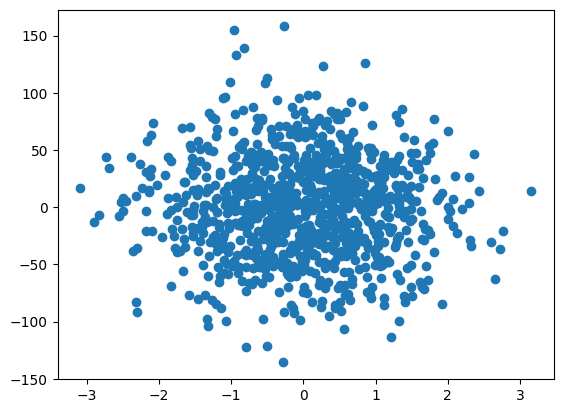

In [96]:
plt.scatter(df['F3'], df['Target'])

In [97]:
## Creating a Target metrix for correlation analysis
Target_metrix = df.corr()[['Target']].drop('Target').T

<Axes: >

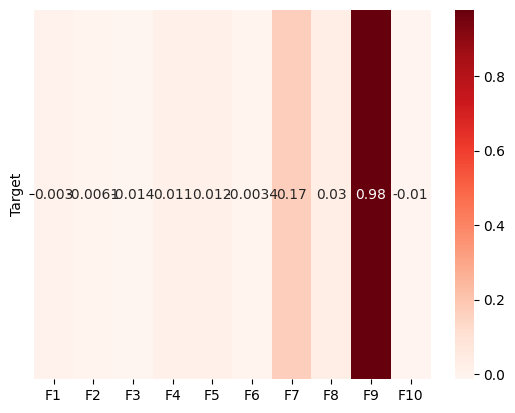

In [98]:
## Checking Correlation b/w Target and Features
sns.heatmap(Target_metrix, annot = True, cmap = 'Reds')

Mostly Features are not very corelated (linearly related) to use linear regression here but still am just creating the model beyond this data and so obviously accuracy will come low

<h2 style = 'color : Orange'>Checking Original Model Performance</h2>

In [99]:
## Splitting my data into train and test
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(df.drop('Target', axis = 1), df.Target, test_size = 0.2)

In [100]:
## Training the data and check accuracy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred, Y_test)

0.9864216862599251

In [101]:
## Checking the slope and intercept
print(lr.coef_)
print(lr.intercept_)

[-0.06961161  0.17350576 -0.19236708  0.20064237  0.17483629  0.1039934
  6.92648728  0.29597615 41.11027223  0.07240628]
-0.03318481835503523


In [102]:
## Creating myOwnLinear Model
class myRegressor:
    def __init__(self):
        self.m = 0
        self.b = 0

    ## defining the fit method

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis = 1)
        beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
        self.b = beta[0]
        self.m = beta[1:]
    
    ## defining the predict method

    
    def predict(self, x):
        return self.b + np.dot(x, self.m)

In [103]:
## Checking accuracy of my model
myR = myRegressor()
myR.fit(X,Y)
my_y_pred = myR.predict(X_test)
r2_score(my_y_pred, Y_test)

0.9868935071127682

Now Let's run train the model 10 times on different datasets for calculating avg accuracy

In [104]:
import sklearn.linear_model
def avg_accuracy(data, model):

    r2_avg_score = []  ## List to store the score
    if model == 'myRegressor':
        reg_model = myRegressor()
    elif model in dir(sklearn.linear_model):
        reg_model = getattr(sklearn.linear_model , model)
        reg_model = reg_model()
    else:
        print("Model not found")
    ## Looping over the data 10 times and getting random train and test data
    for _ in range(10):
        X_train , X_test, Y_train, Y_test = train_test_split(data.drop('Target', axis = 1), data.Target, test_size = 0.2)
        reg_model.fit(X_train, Y_train)
        pred = reg_model.predict(X_test)
        r2_avg_score.append(r2_score(pred, Y_test))
    print((r2_avg_score))
    return np.mean(r2_avg_score)


In [105]:
avg_accuracy(df, 'LinearRegression')

[0.9873126857521224, 0.988215263771888, 0.9831728650237016, 0.9865502340284017, 0.985490640256291, 0.9860629174178355, 0.9869004318473269, 0.9854795147501991, 0.9879817522757491, 0.9875120786304162]


np.float64(0.9864678383753931)

In [106]:
avg_accuracy(df, 'myRegressor')

[0.9883727549662763, 0.9856796342431332, 0.9872377765354511, 0.9850575893075731, 0.985285701606536, 0.9846570040103695, 0.9864166749446222, 0.9851684416903593, 0.9852668624909529, 0.9872523019076244]


np.float64(0.9860394741702898)

<b>Conculsion:</b> Even our model is not as good as built-in linear model but it still close good to it